<a href="https://colab.research.google.com/github/angwelo/ASSIGNMENT-/blob/main/cleaned_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

In [ ]:
#load dataset
df = pd.read_csv(r"C:/Users/Hp/Downloads/archive/cardekho.csv")
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
#checking missing values per column and the percentage
missing = df.isnull().sum()
percentage_missing = round((missing/len(df)) * 100, 2)
data_dict = {"missing_value_count": missing,
            "missing_value_percentage": percentage_missing}
missing_df = pd.DataFrame(data_dict)
missing_df


,missing_value_count,missing_value_percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [ ]:
#Drop any rows where the target variable (selling price) is missing
df['selling_price'].isnull().sum()
df.dropna(subset=["selling_price"], inplace= True)

In [ ]:
#Fill missing values in the “mileage” column with the column’s mean.
df["mileage(km/ltr/kg)"] = df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mean())
df.isnull().sum()


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64

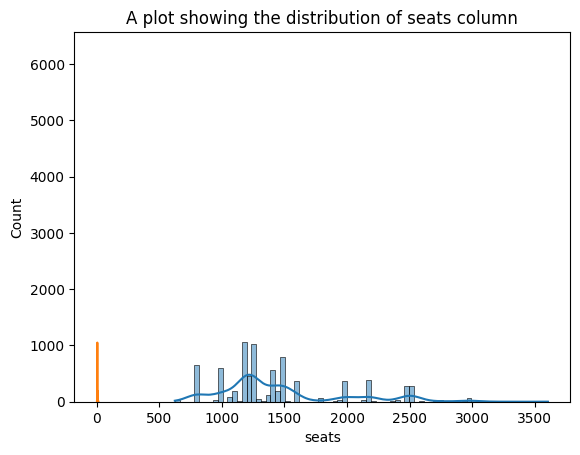

In [ ]:
#visualizing engine & seats
Missing_columns = ["engine", "seats"]
for col in Missing_columns:
    plt.Figure(figsize=(15,5))
    sns.histplot(df, x=df[col], kde=True)
    plt.title(f"A plot showing the distribution of {col} column")
    plt.xlabel(col)


In [ ]:
#Filling missing values with median
for col in Missing_columns:
    df[col] = df[col].fillna(df[col].median())
    print(f"Fill the  missing values for: {col}")
    print("*"*100)


Fill the  missing values for: engine
****************************************************************************************************
Fill the  missing values for: seats
****************************************************************************************************


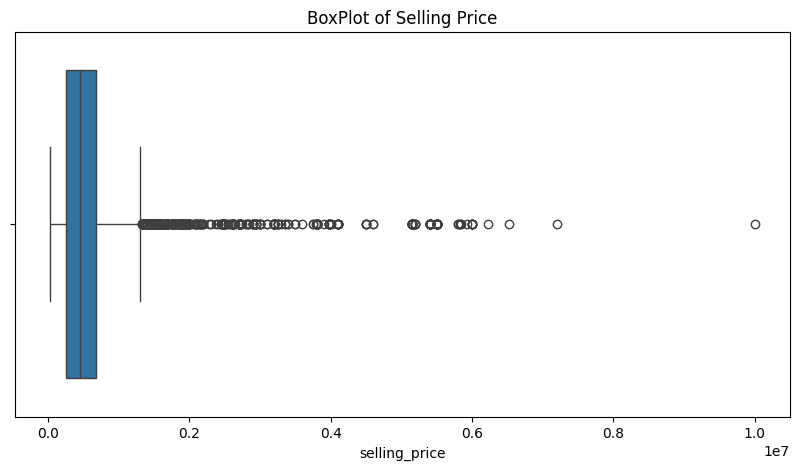

In [ ]:
#Check if there are any outliers in the “selling price” column using a boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df['selling_price'])
plt.title("BoxPlot of Selling Price")
plt.show()




In [ ]:
df_filtered = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)]
df_filtered

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [ ]:
df_filtered = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)]
df_filtered

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [ ]:
# Remove duplicate rows
df_filtered = df_filtered.drop_duplicates()

# Reset index after removing duplicates
df_filtered = df_filtered.reset_index(drop=True)

print(f"Dataset after removing duplicates: {df_filtered.shape[0]} rows remaining.")


Dataset after removing duplicates: 6906 rows remaining.


In [ ]:
df_filtered.columns = df_filtered.columns.str.lower()
df_filtered

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6901,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
6902,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
6903,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
6904,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [ ]:
# 2️⃣ Convert numeric-like strings to numbers
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass

In [ ]:
# 4️⃣ Create a new column: price per kilometre
# Remove extra spaces, tabs, and special characters from column names
df_filtered.columns = df_filtered.columns.str.strip()
df_filtered.columns = df_filtered.columns.str.lower()

# Now create price_per_km
df_filtered['price_per_km'] = df_filtered['selling_price'] / df_filtered['mileage(km/ltr/kg)']

df_filtered


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,price_per_km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,8074.534161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0,13756.613757
6902,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,21073.646850
6903,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,17297.297297
6904,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0,8035.714286


In [ ]:
print(df_filtered.columns.tolist())


['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'price_per_km']


In [ ]:
# 5️⃣ Reset the index after cleaning
df_filtered = df_filtered.reset_index(drop=True)

# 6️⃣ Save cleaned dataset to CSV
df_filtered.to_csv("cleaned_cars.csv", index=False)
print("Cleaned Data Saved as 'cleaned_cars.csv':\n", df_filtered)

Cleaned Data Saved as 'cleaned_cars.csv':
                                    name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
6901  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6902         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
6903                  Hyundai i20 Magna  2013         320000     110000   
6904              Hyundai Verna CRDi SX  2007         135000     119000   
6905             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 ow

In [ ]:
mean_price = df_filtered['selling_price'].mean()
mean_price

np.float64(501378.18114682887)

In [ ]:
# Find the most common fuel type
most_common_fuel = df_filtered['fuel'].value_counts().idxmax()
fuel_counts = df_filtered['fuel'].value_counts()

print("Fuel type counts:\n", fuel_counts)
print("\nMost common fuel type:", most_common_fuel)


Fuel type counts:
 fuel
Diesel    3741
Petrol    3071
CNG         56
LPG         38
Name: count, dtype: int64

Most common fuel type: Diesel


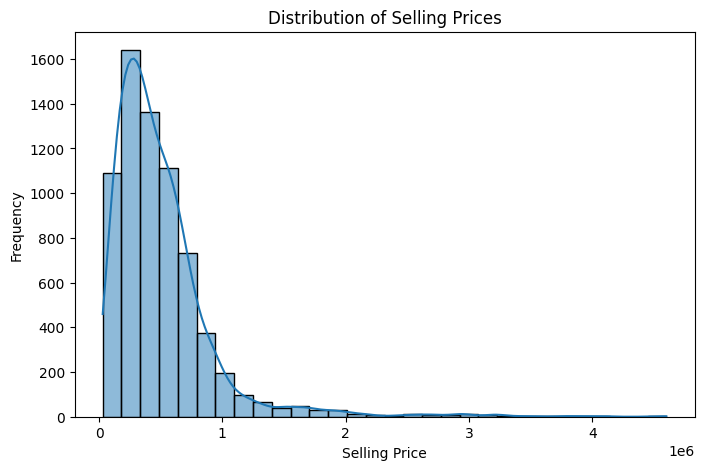

In [ ]:
# Histogram for selling_price
plt.figure(figsize=(8,5))
sns.histplot(df_filtered['selling_price'], bins=30, kde=True)  # kde=True adds a smooth curve
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
current_year = datetime.now().year
if 'year' in df_filtered.columns:
    df_filtered['car_age'] = current_year - df_filtered['year']


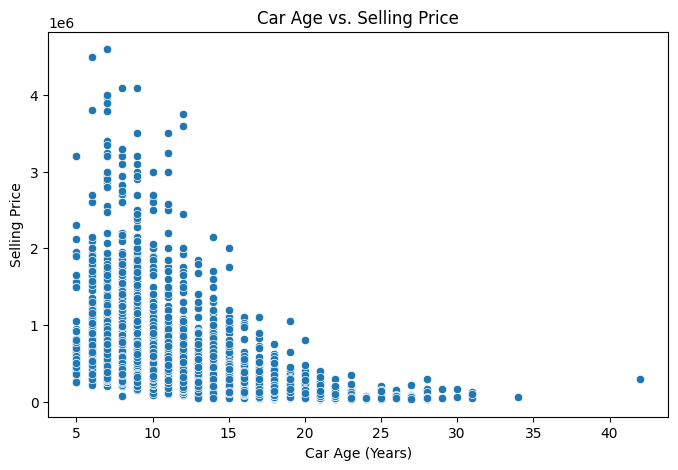

In [ ]:
# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='car_age', y='selling_price', data=df_filtered)
plt.title("Car Age vs. Selling Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price")
plt.show()

In [ ]:
# Group by fuel type and calculate mean selling price
#use .reset_index kumake code cleaner and easier to plot. The fuel column inabehave like a normal column.
avg_price_by_fuel = df_filtered.groupby('fuel')['selling_price'].mean().reset_index()

print(avg_price_by_fuel)


     fuel  selling_price
0     CNG  300499.946429
1  Diesel  620448.482224
2     LPG  200421.052632
3  Petrol  363717.339629


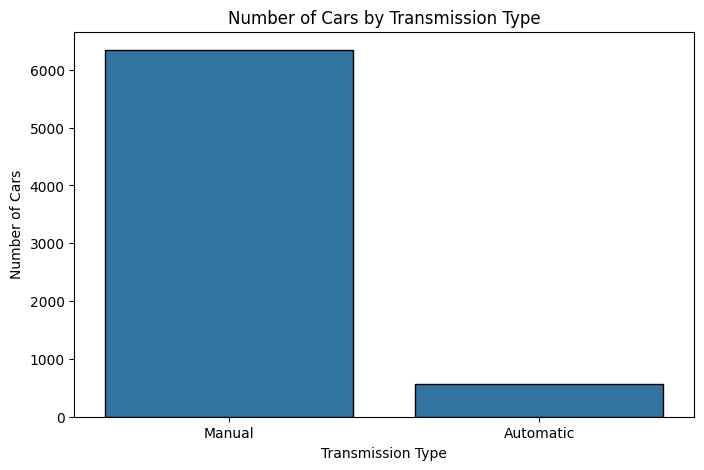

In [ ]:
# Bar chart: count of cars by transmission type
plt.figure(figsize=(8,5))
sns.countplot(x='transmission', data=df_filtered, edgecolor='black')
plt.title("Number of Cars by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.show()

In [ ]:
# Remove leading/trailing spaces and hidden characters from column names
df_filtered.columns = df_filtered.columns.str.strip()

# Now find the highest mileage car
highest_mileage_car = df_filtered.loc[df_filtered['mileage(km/ltr/kg)'].idxmax()]

print(highest_mileage_car)


name                  Maruti Alto 800 CNG LXI Optional
year                                              2019
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    Manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                         40.3
seats                                              4.0
price_per_km                               9868.421053
car_age                                              6
Name: 35, dtype: object


In [ ]:
# Calculate correlation between mileage and selling price
correlation = df_filtered['mileage(km/ltr/kg)'].corr(df_filtered['selling_price'])

print(f"Correlation between mileage and selling price: {correlation:.2f}")


Correlation between mileage and selling price: -0.12


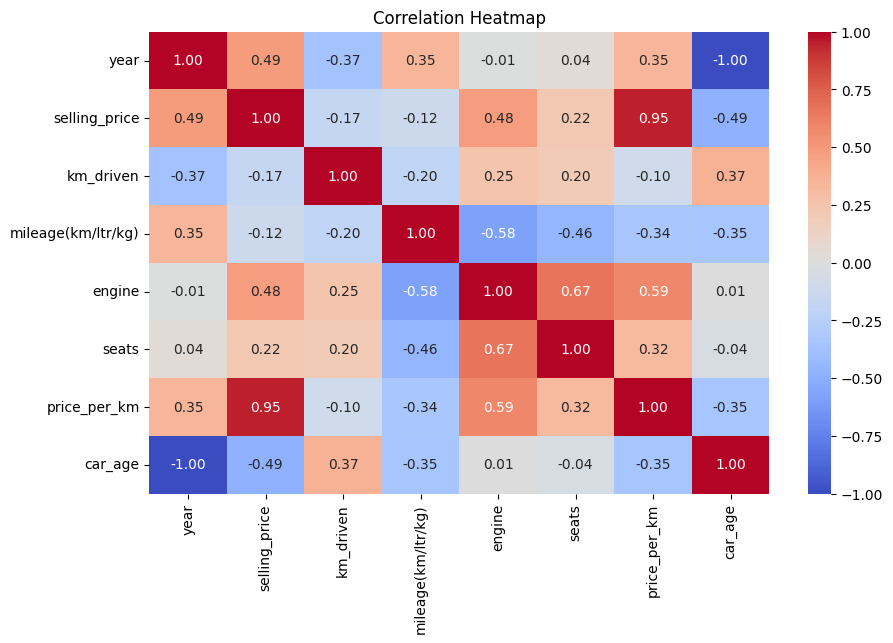

In [ ]:

# Calculate the correlation matrix for numeric columns
corr_matrix = df_filtered.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Group by transmission type and calculate the average selling price
avg_prices = df_filtered.groupby('transmission')['selling_price'].mean()
print(avg_prices)

transmission
Automatic    1.143215e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


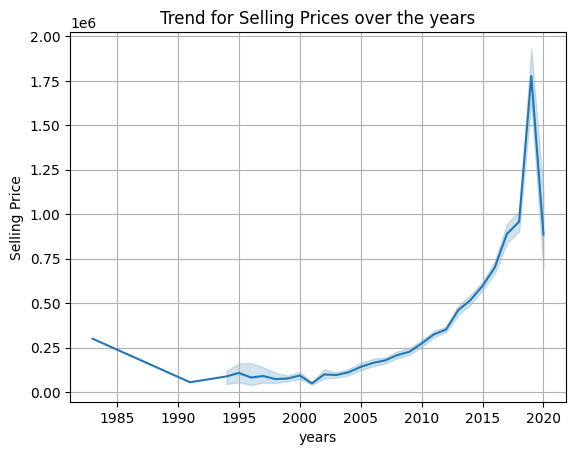

In [ ]:
plt.Figure(figsize=(10, 8))
sns.lineplot(data=df, x='year', y='selling_price')
plt.title("Trend for Selling Prices over the years")
plt.xlabel("years")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

In [ ]:
# Find the index of the most expensive car in each fuel type group
most_expensive_cars = df_filtered.loc[df_filtered.groupby('fuel')['selling_price'].idxmax()]

print(most_expensive_cars[['fuel', 'selling_price']])


        fuel  selling_price
4961     CNG         545000
283   Diesel        4600000
2783     LPG         375000
133   Petrol        4100000


In [ ]:
# Check most common brand
most_common_brand = df_filtered['name'].value_counts().idxmax()

print(f"The most common brand is: {most_common_brand}")


The most common brand is: Maruti Swift Dzire VDI


In [ ]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])
most_frequent_brand = df['brand'].value_counts().idxmax()
most_frequent_brand

'Maruti'

In [ ]:
# Group by fuel_type and transmission, count the combinations, and sort
top_combinations = (
    df_filtered.groupby(['fuel', 'transmission'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(5)
)

print(top_combinations)


     fuel transmission  count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    284
4  Petrol    Automatic    280
0     CNG       Manual     56


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [ ]:
#Train a Linear Regression model to predict the car’s selling price using selected features.
# Split the dataset into train/test sets, train the model, and print the coefficients and intercept.

In [ ]:
# Select numeric features for regression
features = ['mileage(km/ltr/kg)', 'engine', 'max_power']
X = df_filtered[features]
y = df_filtered['selling_price']
print(features)

['mileage(km/ltr/kg)', 'engine', 'max_power']


In [ ]:
df[df['engine'].apply(lambda x: isinstance(x, str))]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand


ERROR! Session/line number was not unique in database. History logging moved to new session 14


In [ ]:
df[['engine']].applymap(type).value_counts()


C:\Users\Hp\AppData\Local\Temp\ipykernel_2428\4090442273.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['engine']].applymap(type).value_counts()


engine         
<class 'float'>    8128
Name: count, dtype: int64